In [31]:
import pandas as pd 
import numpy as np
import seaborn as sns
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [2]:
#upload player data 
player_data = pd.read_csv(r'C:\Users\akobe\OneDrive\Desktop\Lighthouse\After\NHL-Stats\Scoring_Rates\Data\player_data\player_data.csv', index_col = [0]) #index col makes sures another index column is not needed

In [3]:
player_data.head()

,game_num,date,team_id,team_code,player_id,name,shoots,position,toi,assists,...,takeaways,giveaways,sh_goals,sh_assists,blocked,plus_minus,even_toi,pp_toi,sh_toi,home_away
0,2022020001,2022-10-07T18:00:00Z,18,NSH,8478508,Yakov Trenin,L,C,17:03,0,...,0,0,0,0,0,0,13:55,0:00,3:08,home
1,2022020001,2022-10-07T18:00:00Z,18,NSH,8475218,Mattias Ekholm,L,D,21:02,1,...,0,1,0,0,0,2,18:38,0:00,2:24,home
2,2022020001,2022-10-07T18:00:00Z,18,NSH,8476925,Colton Sissons,R,C,14:08,0,...,0,1,0,0,1,-1,12:07,0:00,2:01,home
3,2022020001,2022-10-07T18:00:00Z,18,NSH,8476887,Filip Forsberg,R,LW,16:44,1,...,0,1,0,0,0,1,12:37,4:03,0:04,home
4,2022020001,2022-10-07T18:00:00Z,18,NSH,8475798,Mikael Granlund,L,C,17:52,1,...,0,0,0,0,0,1,13:28,4:03,0:21,home


In [4]:
player_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47208 entries, 0 to 5610
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   game_num    47208 non-null  int64  
 1   date        47208 non-null  object 
 2   team_id     47208 non-null  int64  
 3   team_code   47208 non-null  object 
 4   player_id   47208 non-null  int64  
 5   name        47208 non-null  object 
 6   shoots      47208 non-null  object 
 7   position    47208 non-null  object 
 8   toi         47208 non-null  object 
 9   assists     47208 non-null  int64  
 10  goals       47208 non-null  int64  
 11  shots       47208 non-null  int64  
 12  hits        47208 non-null  int64  
 13  pp_goals    47208 non-null  int64  
 14  pp_assists  47208 non-null  int64  
 15  pim         47208 non-null  int64  
 16  fo_perc     17747 non-null  float64
 17  fo_wins     47208 non-null  int64  
 18  fo_taken    47208 non-null  int64  
 19  takeaways   47208 non-null

## Cleaning

In [5]:
#change date to datetime data type 
player_data['date'] = pd.to_datetime(player_data['date'])

In [6]:
#remove timestamp from date column 
player_data['date'] = player_data['date'].dt.strftime('%Y-%m-%d')

In [7]:
#change time on ice variables to time data type 
player_data['toi'] = pd.to_datetime(player_data['toi'], format='%M:%S').dt.time
player_data['even_toi'] = pd.to_datetime(player_data['even_toi'], format='%M:%S').dt.time
player_data['pp_toi'] = pd.to_datetime(player_data['pp_toi'], format='%M:%S').dt.time
player_data['sh_toi'] = pd.to_datetime(player_data['sh_toi'], format='%M:%S').dt.time

In [8]:
#change time on ice variables to timedelta for addition and convert to minutes
player_data['toi'] = pd.to_timedelta(player_data['toi'].astype(str))/pd.Timedelta('60s')
player_data['even_toi'] = pd.to_timedelta(player_data['even_toi'].astype(str))/pd.Timedelta('60s')
player_data['pp_toi'] = pd.to_timedelta(player_data['pp_toi'].astype(str))/pd.Timedelta('60s')
player_data['sh_toi'] = pd.to_timedelta(player_data['sh_toi'].astype(str))/pd.Timedelta('60s')

## Different Player Statistics 

## Leaf's players min played vs. goals scored 

In [9]:
#create a dataframe of just Toronto 
leaf_data = player_data.loc[player_data['team_code'] == 'TOR']

In [10]:
leaf_data.head(2)

,game_num,date,team_id,team_code,player_id,name,shoots,position,toi,assists,...,takeaways,giveaways,sh_goals,sh_assists,blocked,plus_minus,even_toi,pp_toi,sh_toi,home_away
251,2022020015,2022-10-13,10,TOR,8470966,Mark Giordano,L,D,19.716667,1,...,1,1,0,0,2,1,15.30,2.15,2.266667,home
252,2022020015,2022-10-13,10,TOR,8475718,Justin Holl,R,D,20.466667,0,...,2,1,0,0,4,0,16.05,0.00,4.416667,home


In [11]:
#get the total number of goals for each player (season totals)
#Note that the name argument within reset_index() specifies the name for the new column produced by GroupBy.
num_goals_season = leaf_data.groupby('name')['goals'].sum().reset_index(name='total_goals')  

In [12]:
#get total toi for the season for each leaf's player
season_toi = leaf_data.groupby('name')['toi'].sum().reset_index(name='total_toi')  

In [13]:
#combine totals dataframes into a single dataframe 
goals_toi_total = pd.merge(num_goals_season, season_toi, on='name', how='outer')

In [14]:
#calculate # of goals scored per minutes played 
goals_toi_total['goals_time'] = goals_toi_total['total_goals']/goals_toi_total['total_toi']

In [15]:
#show only players with goals 
goals_toi_total = goals_toi_total[goals_toi_total['total_goals'] != 0]

In [16]:
#get total # of short-handed goals per season
season_sh_goals = leaf_data.groupby('name')['sh_goals'].sum().reset_index(name='total_sh_goals')  

In [17]:
#get total # of power play goals per season
season_pp_goals = leaf_data.groupby('name')['pp_goals'].sum().reset_index(name='total_pp_goals')  

In [18]:
#merge sh and pp goals to df
goals_toi_total = pd.merge(goals_toi_total, season_sh_goals, on='name', how='left')
goals_toi_total = pd.merge(goals_toi_total, season_pp_goals, on='name', how='left')

In [19]:
#calculate total even strength goals for the season 
goals_toi_total['total_even_goals'] = goals_toi_total['total_goals'] - (goals_toi_total['total_sh_goals']+goals_toi_total['total_pp_goals'])

In [20]:
goals_toi_total.head(2)

,name,total_goals,total_toi,goals_time,total_sh_goals,total_pp_goals,total_even_goals
0,Alex Kerfoot,10,1198.75,0.008342,1,2,7
1,Auston Matthews,40,1500.60,0.026656,0,13,27


In [21]:
#top 10 season goal scorers 
top_10_scorers = goals_toi_total.nlargest(10, 'total_goals')
top_10_scorers = top_10_scorers.drop(['total_goals', 'total_toi', 'goals_time'], axis=1)
top_10_scorers = top_10_scorers.reset_index(drop=True)

In [22]:
top_10_scorers.head(2)

,name,total_sh_goals,total_pp_goals,total_even_goals
0,Auston Matthews,0,13,27
1,William Nylander,0,9,31


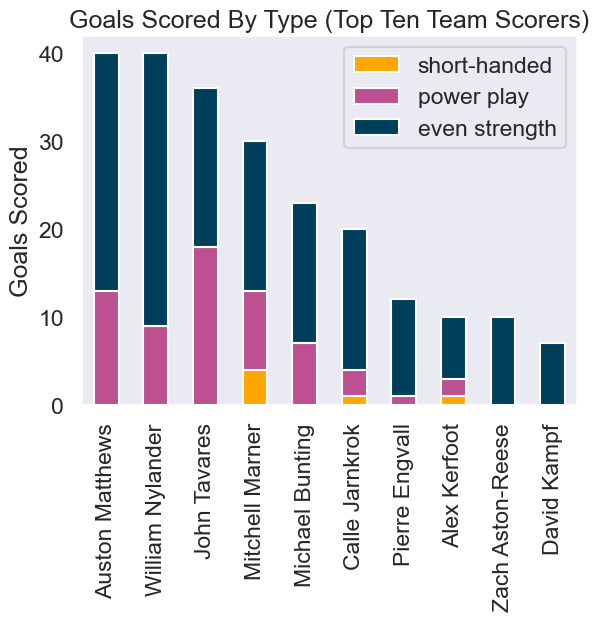

In [39]:
#set theme
sns.set_theme(context = 'talk', style = 'dark')

#stacked bar chart - top 10 goal scorers 
top_10_scorers.set_index('name').plot(kind='bar', stacked=True, color=['#ffa600', '#bc5090', '#003f5c'], edgecolor='white')

# labels for x & y axis
plt.xlabel('')
plt.ylabel('Goals Scored')

plt.legend(labels = ['short-handed','power play','even strength'])
 
# title of plot
plt.title('Goals Scored By Type (Top Ten Team Scorers)')

# save the plot as PNG file
plt.savefig("goals_scored_by_type.jpg", dpi=300)

## League Top 20 Scorers 